In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load first txt file
df_demo = pd.read_csv("df_final_demo.txt")

# View structure
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load first txt file
df_clients = pd.read_csv("df_final_experiment_clients.txt")

# View structure
df_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [50]:

# 1. Lowercase the column names
df_clients.columns = df_clients.columns.str.lower()

# 2. Lowercase all string/text values
df_clients['variation'] = df_clients['variation'].str.lower()

df_clients

,client_id,variation
0,9988021,test
1,8320017,test
2,4033851,control
3,1982004,test
4,9294070,control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [51]:
# Count NaNs in the 'variation' column
nan_count = df_clients['variation'].isna().sum()

print(f"Number of NaNs in 'variation' column: {nan_count}")

Number of NaNs in 'variation' column: 20109


In [ ]:
# Merge on client_id
df_demo = df_demo.merge(df_clients, on='client_id', how='left')

df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [ ]:
# Group and count
df_demo.groupby('client_id')['variation'].nunique().value_counts()

variation
1    50500
0    20109
Name: count, dtype: int64

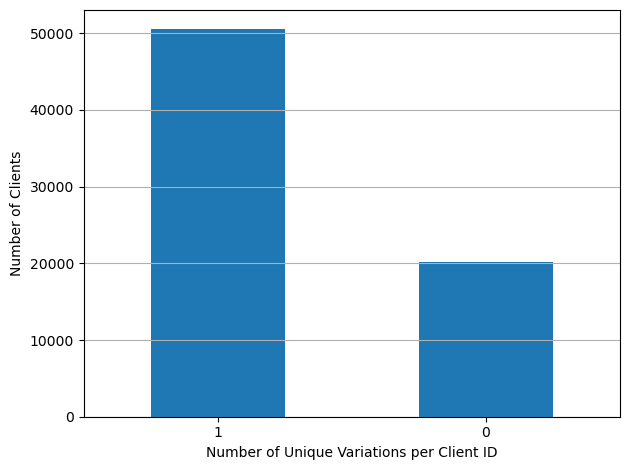

In [73]:
import matplotlib.pyplot as plt

variation_counts = df_demo.groupby('client_id')['variation'].nunique().value_counts()

# Plot
variation_counts.plot(kind='bar')

# Labels and title
plt.xlabel('Number of Unique Variations per Client ID')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [74]:
df_demo.groupby('client_id')['gendr'].nunique().value_counts()


gendr
1    70595
0       14
Name: count, dtype: int64

gendr
U    34.17
M    33.61
F    32.22
X     0.00
Name: count, dtype: float64


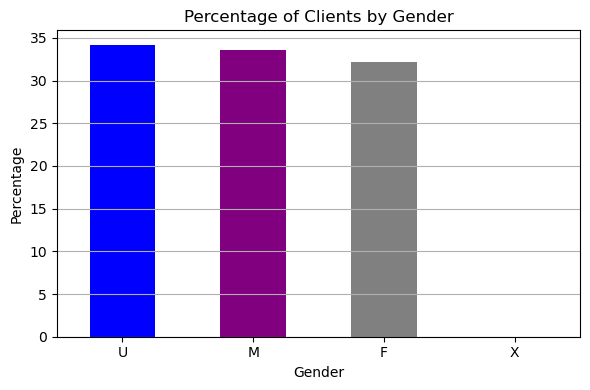

In [79]:
# Count clients per gender
gender_counts = df_demo['gendr'].value_counts()
#Percentage
gender_percentages = (gender_counts / gender_counts.sum()) * 100
#print
print(gender_percentages.round(2))


# Bar Chart
plt.figure(figsize=(6, 4))
gender_percentages.plot(kind='bar', color=['blue', 'purple', 'gray'])
plt.title('Percentage of Clients by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load third txt file
df_web1 = pd.read_csv("df_final_web_data_pt_1.txt")

# View structure
df_web1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load third txt file
df_web2 = pd.read_csv("df_final_web_data_pt_2.txt")

# View structure
df_web2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [69]:
# Merging two last data frames
merged_df = pd.merge(df_web1, df_web2, on=['client_id','visitor_id' ,'visit_id','process_step','date_time'],how='outer')  # or 'left', 'right', 'outer'
merged_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05


In [80]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
...,...,...,...,...,...
755400,9999875,738878760_1556639849,931268933_219402947_599432,start,2017-06-01 22:40:01
755401,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47


In [12]:
df_clients

,client_id,Variation
0,9988021,test
1,8320017,test
2,4033851,control
3,1982004,test
4,9294070,control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [ ]:
# Suppose this is another DataFrame with age info
df_clients = pd.DataFrame({
    'client_id': [101, 102, 103, 104],
    'Variation': [25, 30, 22, 28]
})

# Merge on client_id
df = df.merge(age_df, on='client_id', how='left'